# Vehicle and Pedestrian Detection
using Haar Cascade Classifier

- detect pedestrians
- using on videos
- using on vehicles

---
### Imports and Helper-functions

In [6]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis == False:
        plt.axis('off')
    plt.show()

In [8]:
def get_random_img_path(search_path='../../res/img', skip=["flickr"]):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                if not any(i in full_path for i in skip):
                    image_paths.append(full_path)

    return random.choice(image_paths)

---
### Testing on first frame of an Video

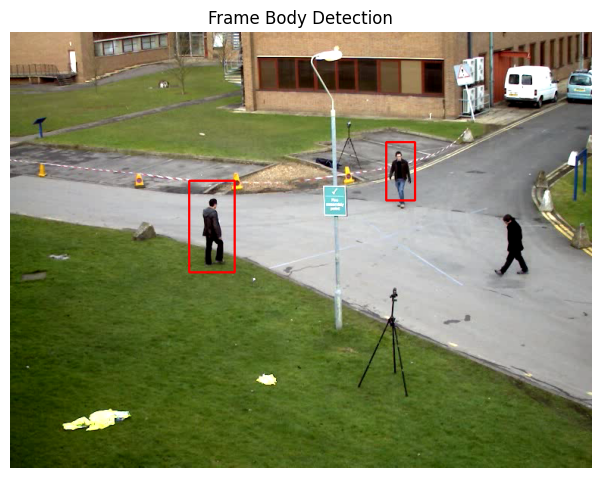

In [9]:
cap = cv2.VideoCapture('../../res/img/course_img/walking.avi')

body_classifier = cv2.CascadeClassifier('../../res/haarcascade_classifier/haarcascade_fullbody.xml')

ret, frame = cap.read()

if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

    for x, y, w, h in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

cap.release()
imshow(frame, "Frame Body Detection") 

---
### Detecting Pedestrians in 15 sec Video

We use cv2.VideoWriter to save the output as an AVI file.

```python
cv2.VideoWriter(video_output.avi, cv2.VideoWriter_fourcc('M','J','P','G'), FPS, (width, height))
```

Formats can be:
- 'M','J','P','G' or MJPG
- MP4V
- X264
- avc1
- XVID

In [11]:
cap = cv2.VideoCapture('../../res/img/course_img/walking.avi')

width = int(cap.get(3))
height = int(cap.get(4))

out = cv2.VideoWriter('../../res/img/course_img/walking_output.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (width, height))

body_detector = cv2.CascadeClassifier('../../res/haarcascade_classifier/haarcascade_fullbody.xml')

while True:
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        bodies = body_detector.detectMultiScale(gray, 1.2, 3)
        for x, y, w, h in bodies:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        out.write(frame)
    else:
        break

cap.release()

Playing video in google colab

In [ ]:
!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('walking_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

---
### Vehicle detection

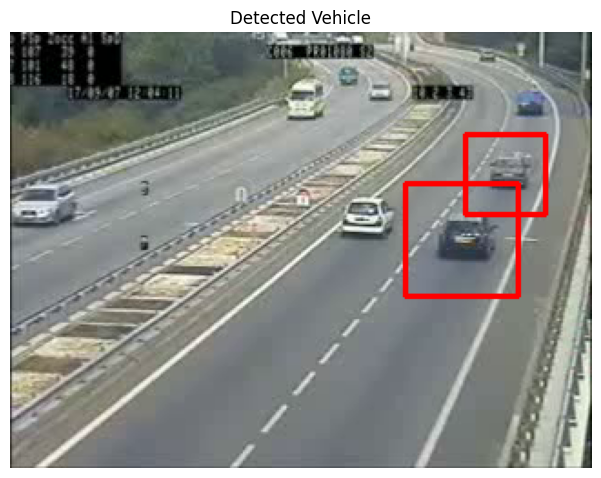

In [12]:
cap = cv2.VideoCapture('../../res/img/course_img/cars.avi')

vehicle_detector = cv2.CascadeClassifier('../../res/haarcascade_classifier/cars.xml')

ret, frame = cap.read()
if ret:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    vehicles = vehicle_detector.detectMultiScale(gray, 1.3, 2)

    for x, y, w, h in vehicles:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)

cap.release()
imshow(frame, "Detected Vehicle")

---
### 15 sec clip Vehicle

In [25]:
cap = cv2.VideoCapture('../../res/img/course_img/cars.avi')

width = int(cap.get(3))
height = int(cap.get(4))

out = cv2.VideoWriter('../../res/img/course_img/cars_output.mp4', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 30, (width, height))

body_detector = cv2.CascadeClassifier('../../res/haarcascade_classifier/cars.xml')

while True:
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        bodies = body_detector.detectMultiScale(gray, 1.2, 3)
        for x, y, w, h in bodies:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
        out.write(frame)
    else:
        break

cap.release()

---